In [31]:
import numpy as np
from forward_mode import ForwardMode
from optimizers import Optimizer
import matplotlib.pyplot as plt
import time
#  non-convex function to test the performance of methods with optimum at -1,1
fx = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
x = np.linspace(-3,3,200)
y = np.linspace(-3,3,200)
X, Y = np.meshgrid(x, y)
Z = fx(X,Y)
x = 1
y = 2
x_init = [x,y]
opt_x = [-1,1]

In [32]:
def trace_plot(optimizers, fx,x_init,n_iter):
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x, y)
    Z = fx(X,Y)
    fig = plt.figure(figsize = (16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    iter_xs = []
    for k,v in optimizers.items():
        time,iter_z,iter_xy = v(x_init, fx, n_iter,verbose = True)
        iter_xs.append(iter_xy)
        iter_z = np.array(iter_z)
        iter_x = np.array(iter_xy)[:,0]
        iter_y = np.array(iter_xy)[:,1]
        ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
        ax.plot(iter_x,iter_y, iter_z, marker = '*', alpha = .4,label = k)
        ax.legend()
        ax.set_title('f(x,y) = (1 - x)^2 + 100*(y - x^2)^2')
        ax.view_init(65, 34)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    plt.show()
    return iter_xs

In [33]:
optimizers = {"Momentum": Optimizer.momentum , "ADAGRAD": Optimizer.ADAGRAD}

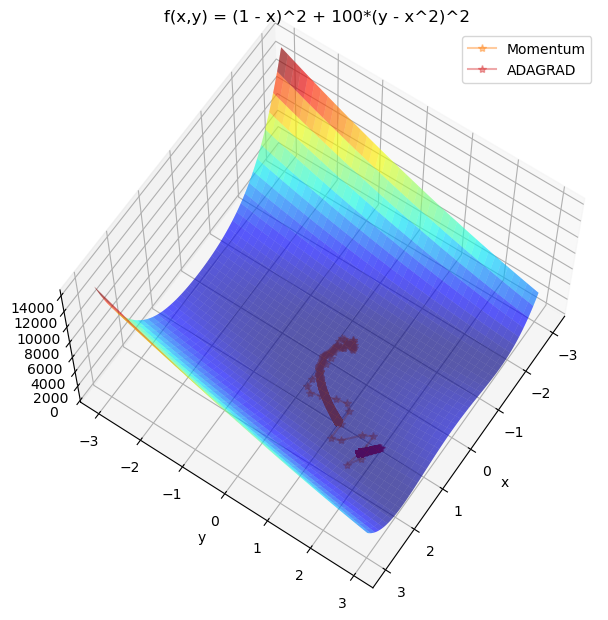

In [34]:
iter_x = trace_plot(optimizers,fx,x_init,n_iter=10000) # Add more to the input dict for more plots